In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
print(train_data.shape)

(404, 13)


In [3]:
print(test_data.shape)

(102, 13)


In [4]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [5]:
print(train_targets[0])

15.2


In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [7]:
print(train_data[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model




In [17]:
import numpy as np


import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Processing fold#' + str(i))
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold#0
Processing fold#1
Processing fold#2
Processing fold#3


In [18]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

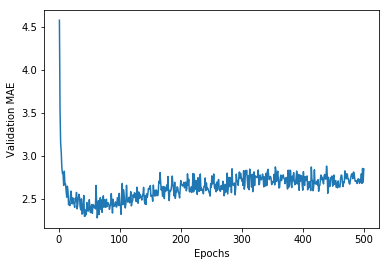

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

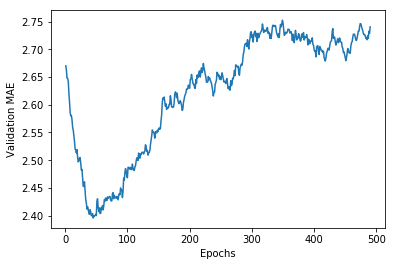

In [21]:
smoothed_mae_history = smooth_curve(average_mae_history[10: ])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [24]:
model = build_model()
model.fit(train_data, 
          train_targets, 
          epochs = 80, 
          batch_size = 16, 
          verbose = 1)

Epoch 1/80
404/404 [==============================] - 0s 931us/step - loss: 495.1821 - mean_absolute_error: 20.1802
Epoch 2/80
404/404 [==============================] - 0s 126us/step - loss: 312.3985 - mean_absolute_error: 15.3998
Epoch 3/80
404/404 [==============================] - 0s 122us/step - loss: 149.8975 - mean_absolute_error: 9.8676
Epoch 4/80
404/404 [==============================] - 0s 124us/step - loss: 68.1411 - mean_absolute_error: 6.2106
Epoch 5/80
404/404 [==============================] - 0s 130us/step - loss: 43.2065 - mean_absolute_error: 4.7109
Epoch 6/80
404/404 [==============================] - 0s 109us/step - loss: 32.6847 - mean_absolute_error: 4.0353
Epoch 7/80
404/404 [==============================] - 0s 131us/step - loss: 27.4464 - mean_absolute_error: 3.6445
Epoch 8/80
404/404 [==============================] - 0s 120us/step - loss: 23.9708 - mean_absolute_error: 3.4708
Epoch 9/80
404/404 [==============================] - 0s 128us/step - loss: 21.8505

404/404 [==============================] - 0s 131us/step - loss: 6.2892 - mean_absolute_error: 1.7663
Epoch 73/80
404/404 [==============================] - 0s 113us/step - loss: 6.1775 - mean_absolute_error: 1.7368
Epoch 74/80
404/404 [==============================] - 0s 113us/step - loss: 6.1583 - mean_absolute_error: 1.7379
Epoch 75/80
404/404 [==============================] - 0s 113us/step - loss: 6.0961 - mean_absolute_error: 1.7314
Epoch 76/80
404/404 [==============================] - 0s 104us/step - loss: 6.0208 - mean_absolute_error: 1.7462
Epoch 77/80
404/404 [==============================] - 0s 108us/step - loss: 6.1627 - mean_absolute_error: 1.7411
Epoch 78/80
404/404 [==============================] - 0s 99us/step - loss: 6.0726 - mean_absolute_error: 1.7584
Epoch 79/80
404/404 [==============================] - 0s 106us/step - loss: 5.9294 - mean_absolute_error: 1.6941
Epoch 80/80
404/404 [==============================] - 0s 101us/step - loss: 5.8425 - mean_absolute_e

In [25]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 976us/step
2.7489338388629987


In [28]:
print(model.predict(test_data)[0])

[8.603659]


In [29]:
!nvidia-smi

Sat Jan  5 11:14:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:01:00.0  On |                  N/A |
| 35%   39C    P8    21W / 260W |  10532MiB / 10981MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  